# Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective
- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

# Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


# Please see the comments and observations in-line

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import zipcodes as zcode

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


from sklearn import metrics

%matplotlib inline

# To build sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve




ModuleNotFoundError: No module named 'zipcodes'

# Load Data

In [2]:
df = pd.read_csv("./Loan_Modelling.csv")

In [3]:
# copying data to another variable to avoid any changes to original dataset
df_cp = df.copy()

# View data

In [4]:
df_cp.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#Understand the shape of the data
df_cp.shape

(5000, 14)

In [6]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
print(df_cp.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [8]:
# Check Null values
df_cp.isnull().sum().sort_values()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df_cp.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
#Checking if any duplicate data exist
df_cp[df_cp.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Insights/Observations:

1. data set has 5000 rows and 14 columns
2. All the coumns are numeric type
3. No spaces or special characters in column names so we will not modify it.
4. There are no null values
5. The following columns have finite number of unique values:
    - Family 
    - Education 
    - Securities_Account
    - CD_Account
    - Online
    - CreditCard
6. Zip code has 467 unique values but can be classified as categorial value, we will have to run some additinal analysis to determine relevance of zipcode
7. There are no duplicate values. 
8. ID is not relevant and can be deleted 
9. Personal_loan is the target variable


In [11]:
#Filtering column types which can be bucketed into categories. 

cat_columns = ["Family","Education","Personal_Loan", "Securities_Account", "CD_Account", "Online","CreditCard"]

for i in cat_columns:
    print('Unique values in',i, 'are :')
    print(df_cp[i].value_counts())
    print('*'*50)

Unique values in Family are :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
**************************************************
Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
Unique values in Online are :
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
Unique values in CreditCard are :
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************


In [12]:
##### Summary of data set
df_cp.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Insights/Observations:

1. Age of customers is between 23 to 67, both mean and median is approximately 45
2. Experience: Maximum is 43 and minimum is -3, this will need some data cleanup. Both mean and median is around 20
3. Income is between 8k to 224k. Mean is 73k, Median 64k. Min and Max need to be rechecked. 
4. Zip code has 467 unique values but can be classified as categorial value, we will have to convert it to counties
5. Family: There is uniform split between family of 1,2,3,4 
6. CCavg: Monthly spend is between 0 to 10k, mean: 1.9k and median: 1.5  
7. Mortgage: Min is 0 and 635k, mean: 56k and median 0. 
8. 480 customers have taken personal loan before
7. The following columns have finite number of unique values and will be candidates for hot encoding:
    - Family 
    - Education 
    - Securities_Account
    - CD_Account
    - Online
    - CreditCard
8. Majority folks do not have security accounts
9. Majority folks do not have CD_account
10. Almost 60% records in the data set have online banking 
11. 70% of the records do not use credit card issued by other bank

In [13]:
#Converting Category type column to Object 
#category_col = ['Family', 'Education', 'Securities_Account','CD_Account', 'Online', 'CreditCard', 'Personal_Loan']
category_col = ['Family', 'Education', 'Securities_Account','CD_Account', 'Online', 'CreditCard']
df_cp[category_col] = df_cp[category_col].astype('object')


### Exploratory Data Analysis

### Univariate analysis:

In [14]:
## Reusing the function which was shared in the trainings to create box plot and histogram for numeric variables

# This function takes numeric columns as input and returns the box plots and histogram for the variables

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.displot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Age

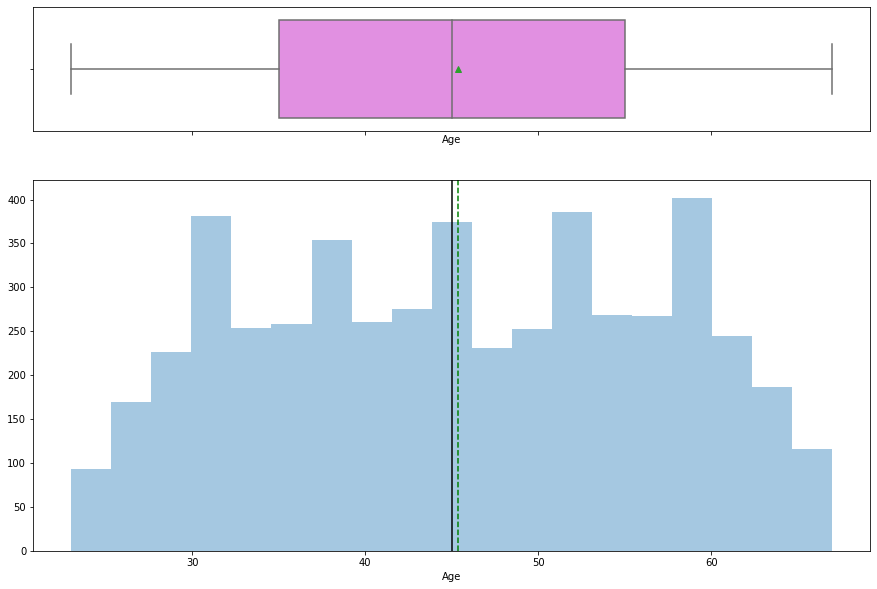

In [15]:
histogram_boxplot(df_cp["Age"])


* The distribution of Customer Age is uniformly spread with a few spikes at age of 30, late 30's, 45 , 55 and 60
* Both mean and median for Age is around 45 years


### Observations on Income

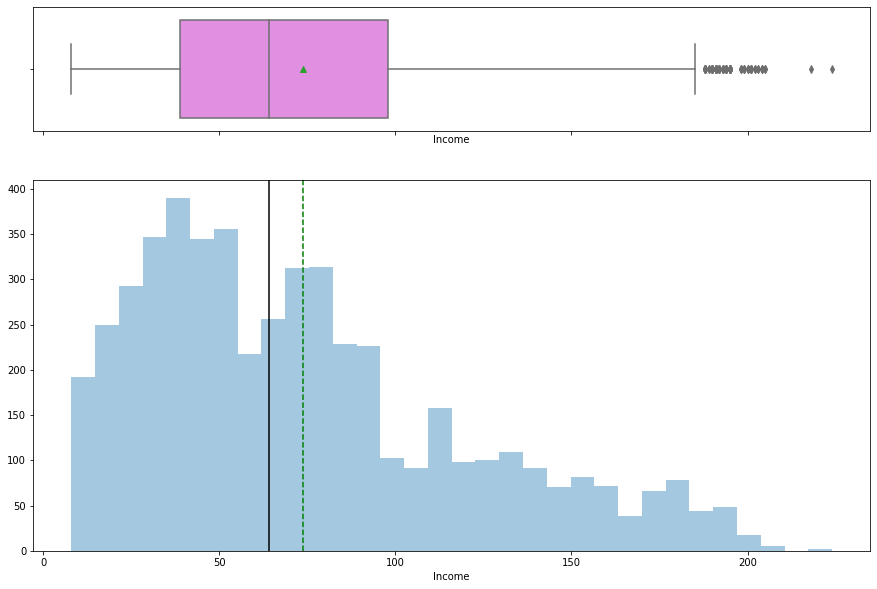

In [16]:
histogram_boxplot(df_cp["Income"])


* Income data is right skewed, Majority of the folks have income less than 100k 
* there are some outliers on higher side


### Observations on Experience

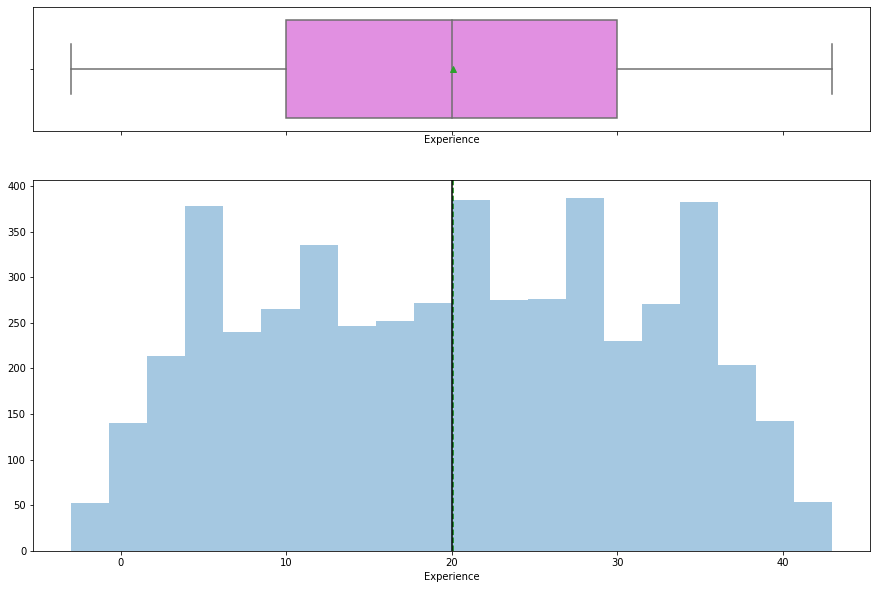

In [17]:
histogram_boxplot(df_cp["Experience"])

 * Has a similar distribution as Age
 * Has negative experience - has to be handled

### Observations on ZIP

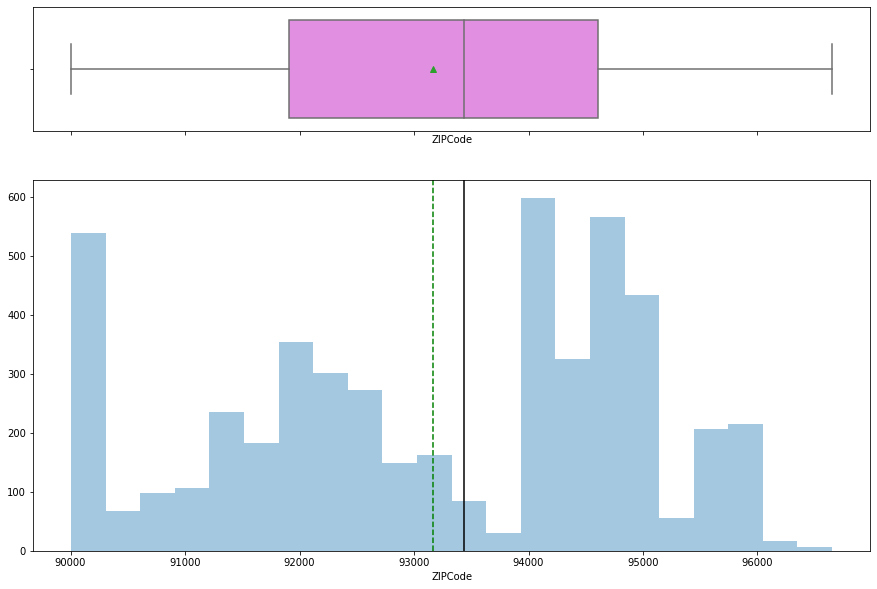

In [18]:
histogram_boxplot(df_cp["ZIPCode"])

* there is high density of customer in certain ZIP codes. Will have to evaluate how to use this data.

### Handling Zip code

In [19]:
#creating a new column called County
print(df_cp.ZIPCode.nunique())
zipcodes = df_cp.ZIPCode.unique()

zip_d = {}
for zipcode in zipcodes:
    county_var = zcode.matching(zipcode.astype('str'))
    if len(county_var)==1: #if found - there are some exceptions
            county=county_var[0].get('county')
    else:
        county = zipcode
    
    zip_d.update({zipcode:county})
    
df_cp['County']=df_cp['ZIPCode'].map(zip_d)

print(df_cp.County.nunique())

467
42


**There are 42 unique counties in the list**

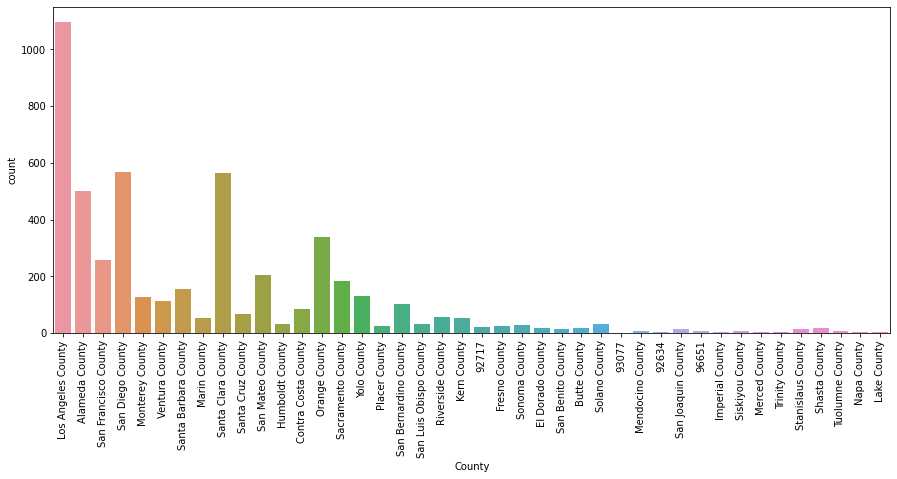

In [20]:
chart_dimension = (15, 6)
fig, ax = plt.subplots(figsize=chart_dimension)
chart = sns.countplot(data=df_cp, x="County", ax=ax);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
None

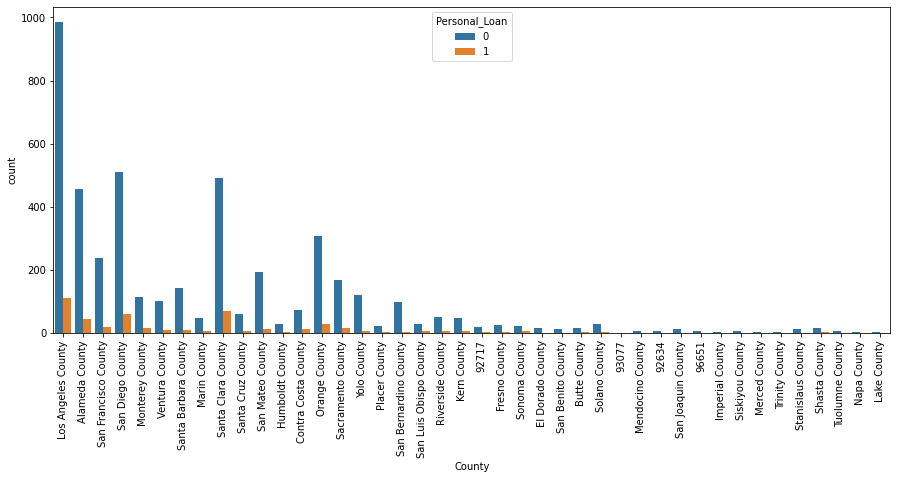

In [21]:
chart_dimension = (15, 6)
fig, ax = plt.subplots(figsize=chart_dimension)
chart = sns.countplot(data=df_cp, x="County",hue="Personal_Loan", ax=ax);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
None

**Customers are spread across 42 counties**

**Maximum number of customer and number of customers who have taken personal loans are from Los Angeles country**


In [22]:
#Converting Zip code to Object 
category_col = ['ZIPCode']
df_cp[category_col] = df_cp[category_col].astype('object')

df_cp.drop(["ZIPCode"],axis=1,inplace=True)


In [23]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   object 
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   object 
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   object 
 10  CD_Account          5000 non-null   object 
 11  Online              5000 non-null   object 
 12  CreditCard          5000 non-null   object 
 13  County              5000 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 547.0+ KB


### Observations on CCAvg Size

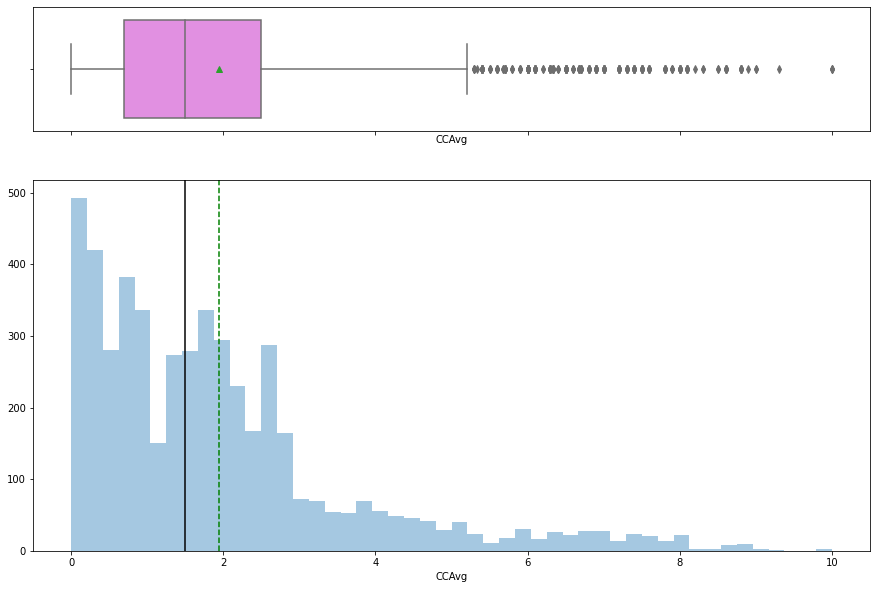

In [24]:
histogram_boxplot(df_cp["CCAvg"])

* Data is right skewed. 
* there are outliers in this variables on the higher side

### Observations on Mortgage

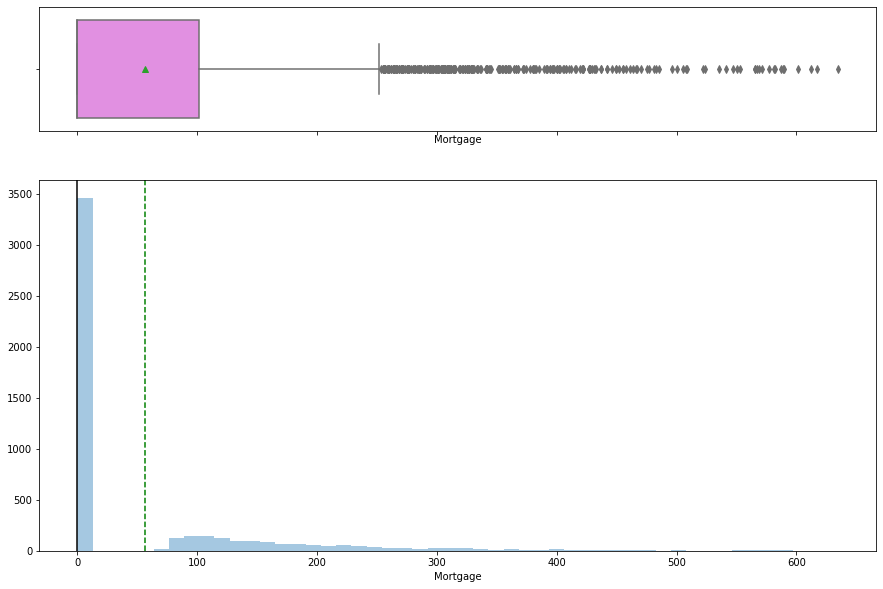

In [25]:
histogram_boxplot(df_cp["Mortgage"])

* Data is right skewed
* There are outliers on the higher side. 

### Bivariate analysis

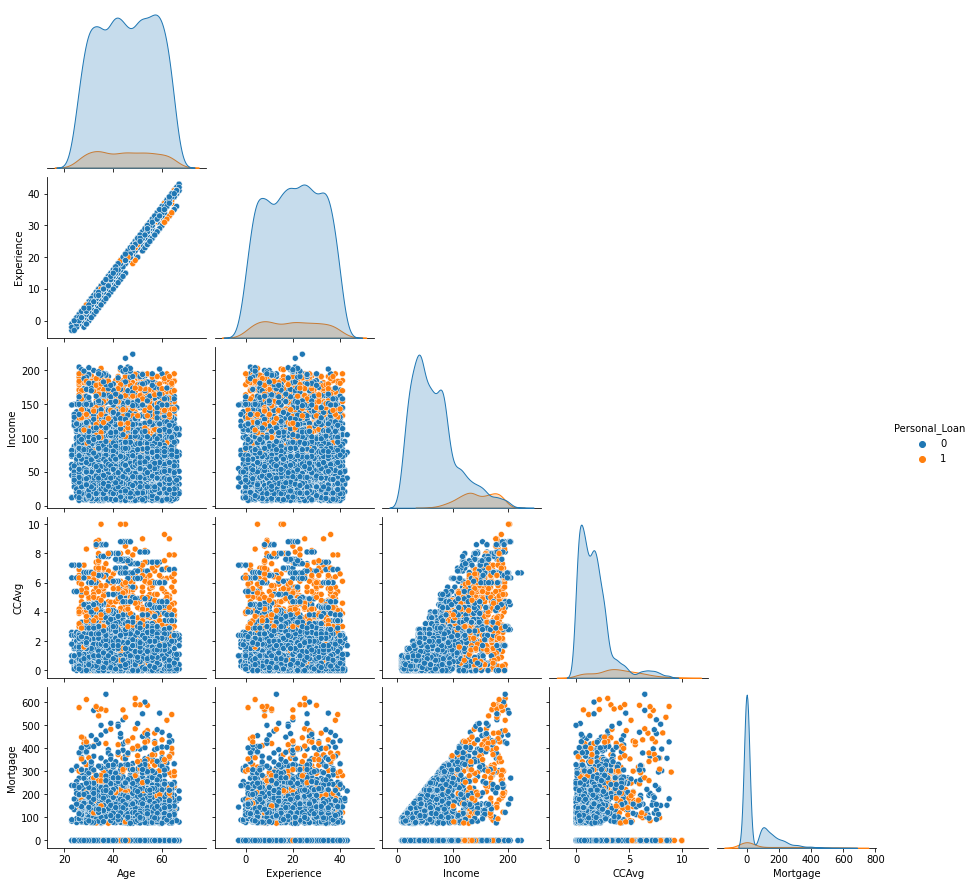

In [26]:
df_num=df.copy()

# Mapping only the non-categorial values
df_num.drop(["ID","ZIPCode","Family","Education","Securities_Account","CD_Account","Online","CreditCard"],axis=1,inplace=True)

sns.pairplot(df_num, hue="Personal_Loan",corner=True)
plt.show()

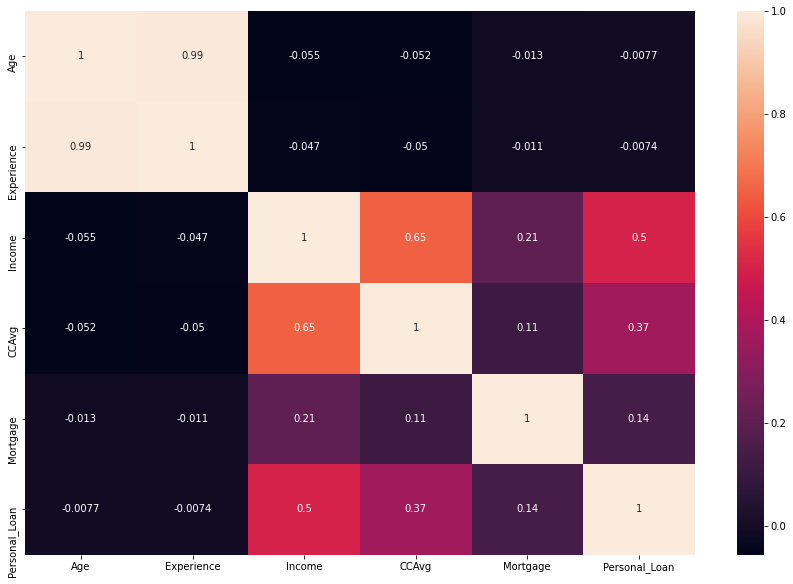

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

## Observations

* Age and experience are highly correlated and one of them can be dropped. 
      - We have to handle negative experience values hence will drop this column
* Income and Average spending on credit card are positively corrleated.
* Mortgage has low positive correlation with income
* Customer with higher income and high mortgage have taken peronal loan 
* Customer with high mortgage have taken peronal loan 
* Customer with higher Credit card avg amount have taken personal loan before

### Age, Income & Credit card spending group 

* Age can be bucketed into 0-30, 30-40, 40-50, 50-60, 60-higher
* Income can be bucketed into 0-50, 50-150, 150-250 
* Credit card spending can be bucketed into 0-1 (median is 1.5, mean is 1.9), 1-2.5, 2.5-10

In [28]:
# creating buckets and adding addional colums for Age, Income and credit care spending
df_cp["Age_group"]=pd.cut(df_cp["Age"],bins = [0,30,40,50,60,100], labels=["LessThan30","30-40","40-50","50-60","60ORHigher"])
df_cp["Income_group"]=pd.cut(df_cp["Income"],bins = [0,50,150,250], labels=["LessThan50k","50-150k","150-250k"])
df_cp["CCAvg_group"]=pd.cut(df_cp["CCAvg"],bins = [0,1,2.5,10], labels=["0-1k","1-2.5k","2.5-10k"])

In [29]:
#categorial column list updated with the additional groups - EXCEPT COUNTY
cat_columns = ["Family","Education","Personal_Loan", "Securities_Account", "CD_Account", "Online","CreditCard","Age_group","Income_group","CCAvg_group"]

In [30]:
df_cp.head()


,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Age_group,Income_group,CCAvg_group
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,Los Angeles County,LessThan30,LessThan50k,1-2.5k
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles County,40-50,LessThan50k,1-2.5k
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,Alameda County,30-40,LessThan50k,0-1k
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco County,30-40,50-150k,2.5-10k
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,Los Angeles County,30-40,LessThan50k,0-1k


In [31]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   Family              5000 non-null   object  
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   object  
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   object  
 10  CD_Account          5000 non-null   object  
 11  Online              5000 non-null   object  
 12  CreditCard          5000 non-null   object  
 13  County              5000 non-null   object  
 14  Age_group           5000 non-null   category
 15  Income_group        5000 non-null   ca

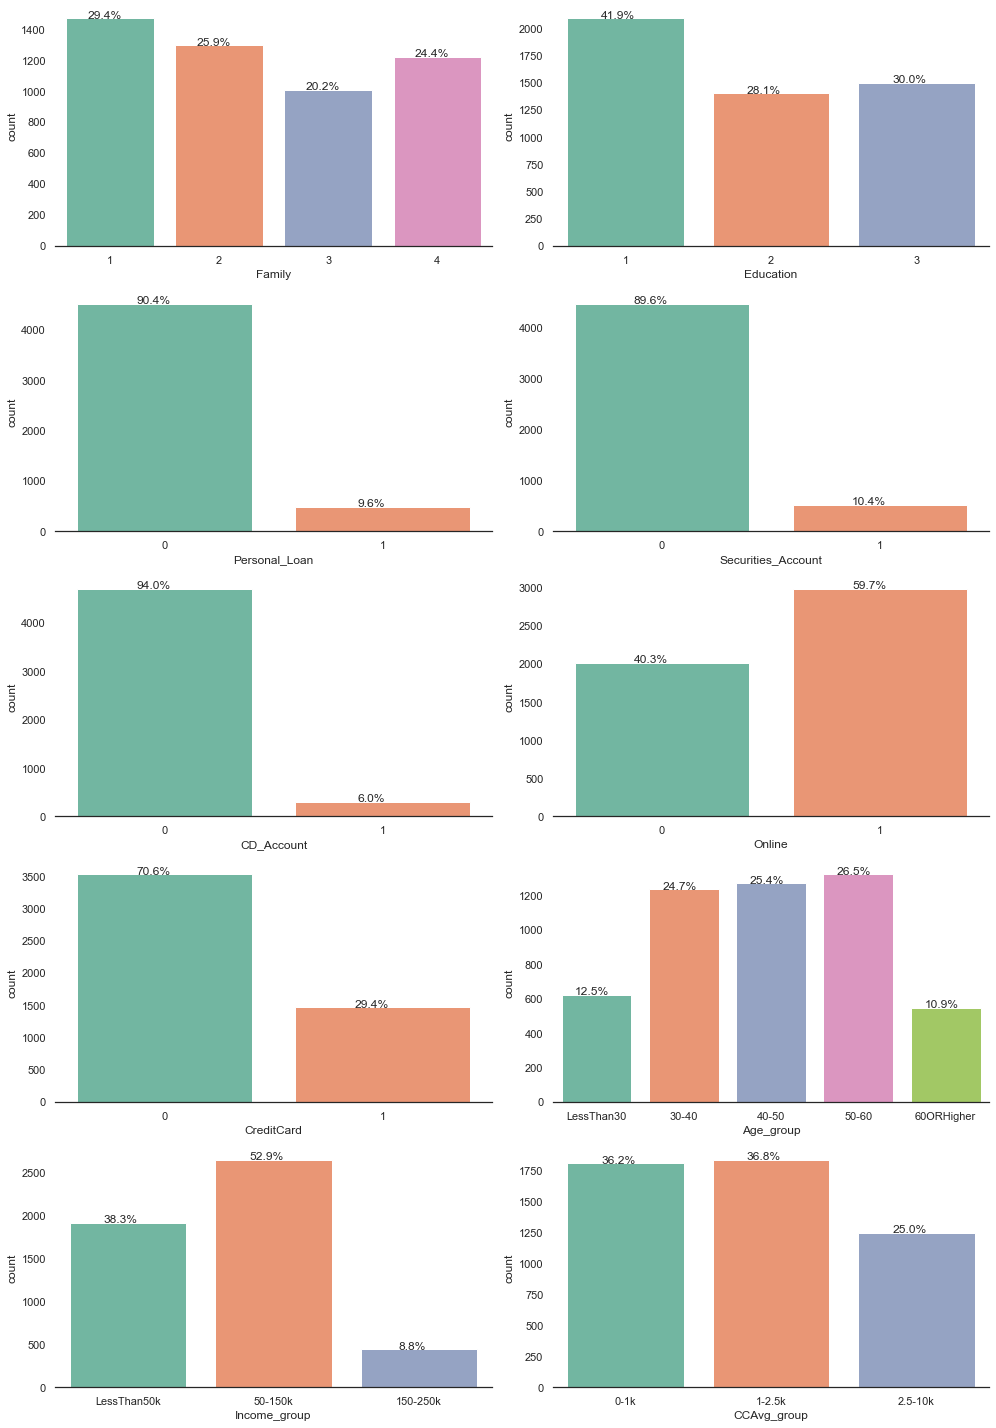

In [32]:
# Making a list of all categorical variables

plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_cp[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_cp[variable], data=df_cp )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_cp[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                    

## plots for personal_loan against each  Column

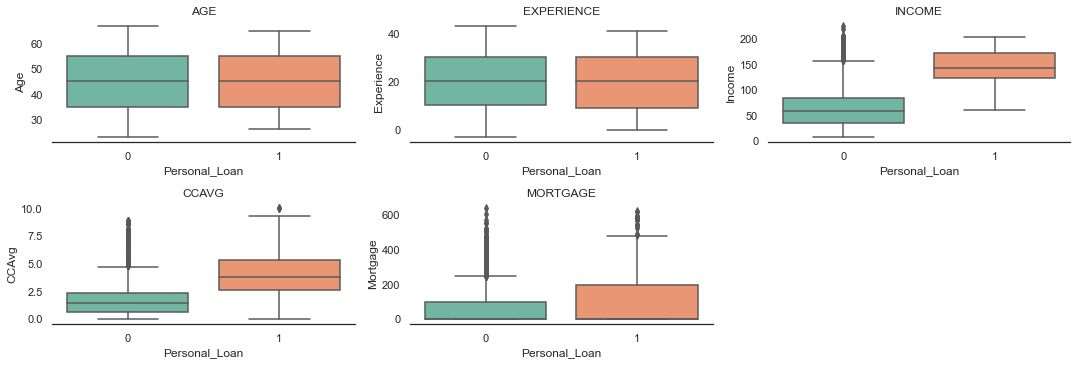

In [33]:
# plot against numeric columns

numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))

for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        sns.boxplot(x='Personal_Loan',y= df_cp[variable], data=df_cp)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

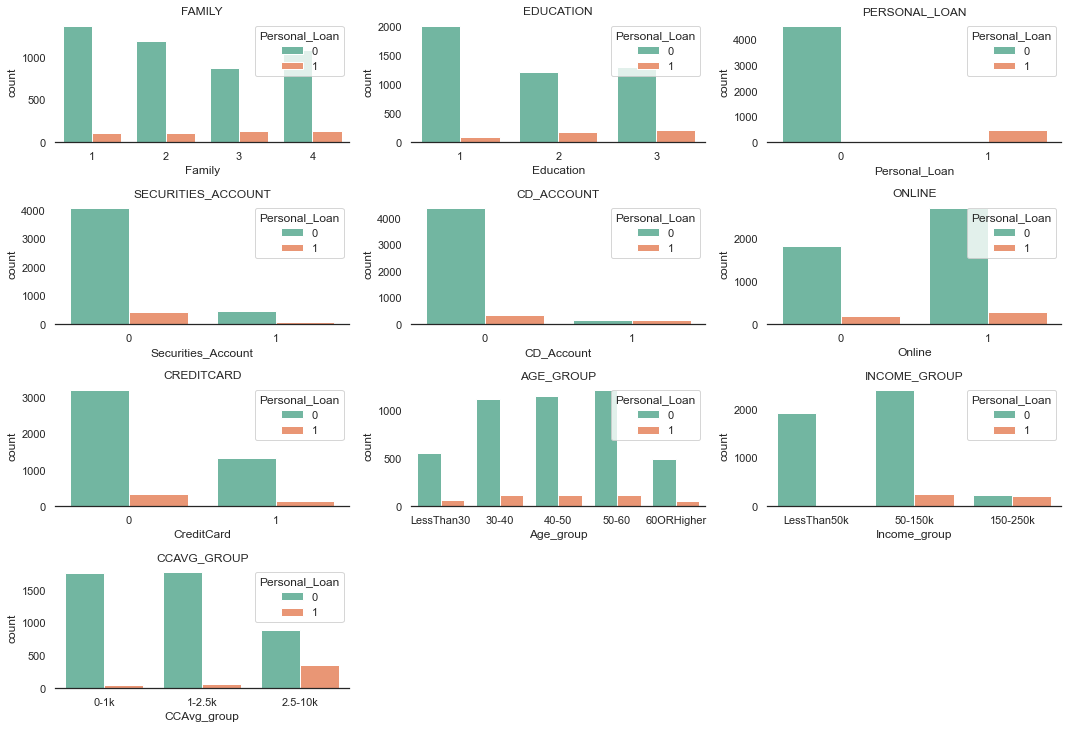

In [34]:
# Plot against categorial columns 

plt.figure(figsize=(15,25))

for i, variable in enumerate(cat_columns):
    plt.subplot(10,3,i+1)
    sns.countplot(x=df_cp[variable],hue='Personal_Loan',data=df_cp)
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout()
    plt.title(variable.upper())
         

## Observations: 

* Customer with with higher income took personal loan
* Customer with high mortgages took personal loan.
* Customers with higher average monthly credit usage took personal loan.
* Customers with higher income had higher average credit card usage and mortgage
* Target variable is Personal_loan which is of categorical data type.
* There were no missing values in the dataset.


### Data Preparation

In [35]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   Family              5000 non-null   object  
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   object  
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   object  
 10  CD_Account          5000 non-null   object  
 11  Online              5000 non-null   object  
 12  CreditCard          5000 non-null   object  
 13  County              5000 non-null   object  
 14  Age_group           5000 non-null   category
 15  Income_group        5000 non-null   ca

In [36]:
df_cp.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Outlier 

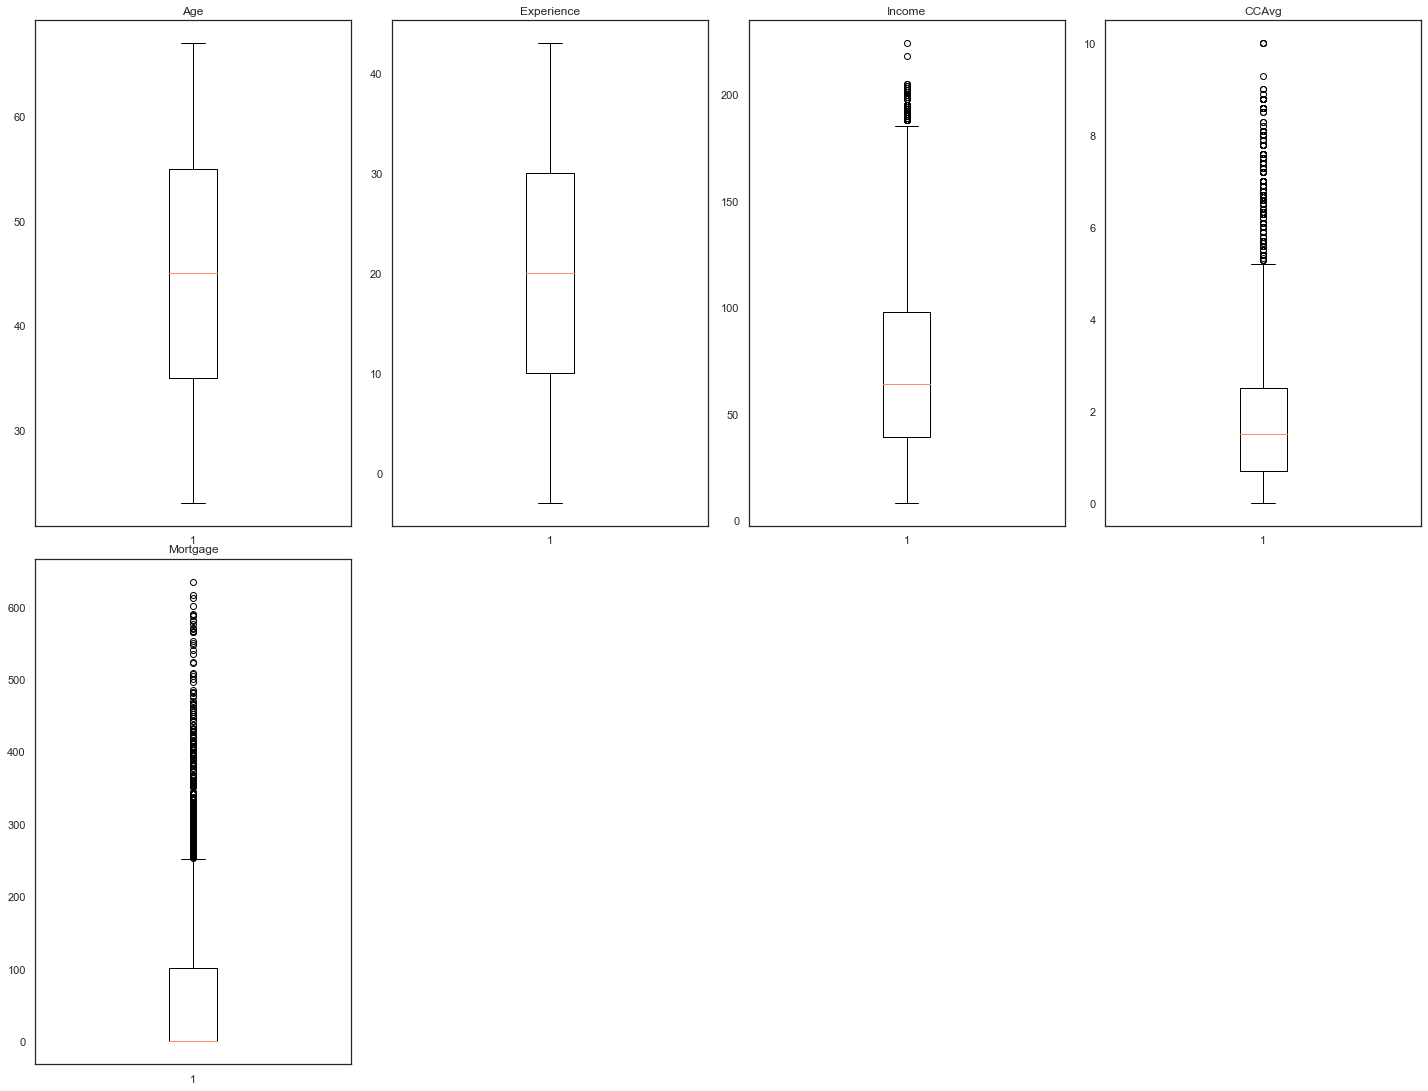

In [37]:
# Numeric columns - Box plots

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_cp[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [38]:
#income, CCAvg, Mortgage needs cleanup of extreme values
print(df_cp.sort_values(by=["Income"],ascending = False).head(5))
print("======================")
print(df_cp.sort_values(by=["CCAvg"],ascending = False).head(5))
print("======================")
print(df_cp.sort_values(by=["Mortgage"],ascending = False).head(5))


        ID  Age  Experience  Income Family  CCAvg Education  Mortgage  \
3896  3897   48          24     224      2   6.67         1         0   
4993  4994   45          21     218      2   6.67         1         0   
526    527   26           2     205      1   6.33         1       271   
2988  2989   46          21     205      2   8.80         1       181   
4225  4226   43          18     204      2   8.80         1         0   

      Personal_Loan Securities_Account CD_Account Online CreditCard  \
3896              0                  0          1      1          1   
4993              0                  0          0      1          0   
526               0                  0          0      0          1   
2988              0                  1          0      1          0   
4225              0                  0          0      1          0   

                    County   Age_group Income_group CCAvg_group  
3896       Monterey County       40-50     150-250k     2.5-10k  
49

In [39]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   Family              5000 non-null   object  
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   object  
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   object  
 10  CD_Account          5000 non-null   object  
 11  Online              5000 non-null   object  
 12  CreditCard          5000 non-null   object  
 13  County              5000 non-null   object  
 14  Age_group           5000 non-null   category
 15  Income_group        5000 non-null   ca

In [40]:
# Dropping Experience - has negative values which needs to be handled and since it has similar distribution as age, keeping Age
# Deleting grouping only for Income, CC Avg since there is high corelation with personal_loan -- Will keep the Income and CC Avg columns
# deleting age_group -- since there is very low coreltion with personal_loan. Will keep age just to try even though low corelation with personal loan

df_cp.drop(["Experience","Income_group","CCAvg_group","Age_group"],axis=1,inplace=True)


In [41]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   object 
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   object 
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   object 
 9   CD_Account          5000 non-null   object 
 10  Online              5000 non-null   object 
 11  CreditCard          5000 non-null   object 
 12  County              5000 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 507.9+ KB


In [42]:
# Hot encoding
df_cp=pd.get_dummies(df_cp,columns=['Family'])
df_cp=pd.get_dummies(df_cp,columns=['Education'])
df_cp=pd.get_dummies(df_cp,columns=['Securities_Account'])
df_cp=pd.get_dummies(df_cp,columns=['CD_Account'])
df_cp=pd.get_dummies(df_cp,columns=['Online'])
df_cp=pd.get_dummies(df_cp,columns=['CreditCard'])
df_cp=pd.get_dummies(df_cp,columns=['County'])


## Logistic regression Model

In [43]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             5000 non-null   int64  
 1   Age                            5000 non-null   int64  
 2   Income                         5000 non-null   int64  
 3   CCAvg                          5000 non-null   float64
 4   Mortgage                       5000 non-null   int64  
 5   Personal_Loan                  5000 non-null   int64  
 6   Family_1                       5000 non-null   uint8  
 7   Family_2                       5000 non-null   uint8  
 8   Family_3                       5000 non-null   uint8  
 9   Family_4                       5000 non-null   uint8  
 10  Education_1                    5000 non-null   uint8  
 11  Education_2                    5000 non-null   uint8  
 12  Education_3                    5000 non-null   u

In [44]:
#dropping columns before running the model
X=df_cp.drop(['Personal_Loan', 'ID'],axis=1)
y=df_cp['Personal_Loan']

#print(X.info())
#Split X and y into training and test set in 70:30 ratio 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=1)

In [45]:
print('Shape of Training set : ',X_train.shape )
print('Shape of test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True))
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 61)
Shape of test set :  (1500, 61)
Percentage of classes in training set:
 0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
 0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


In [46]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [47]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - loan","Actual - No Loan"]],
                  columns = [i for i in ['Predicted - Loan','Predicted - No Loan']])


    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    print(group_counts)
    print("===========")
    print(group_percentages)
    print("===========")

    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#        sns.heatmap(df_cm,fmt='',cmap='Blues')

## Logistic Regression

Accuracy on training set :  0.9631428571428572
Accuracy on test set :  0.9553333333333334
Recall on training set :  0.7009063444108762
Recall on test set :  0.6241610738255033
Precision on training set :  0.8854961832061069
Precision on test set :  0.8942307692307693
F1 on training set :  0.7824620573355818
F1 on test set :  0.7351778656126482
 ====On testing Dataset====
['93', '56', '11', '1340']
['6.20%', '3.73%', '0.73%', '89.33%']


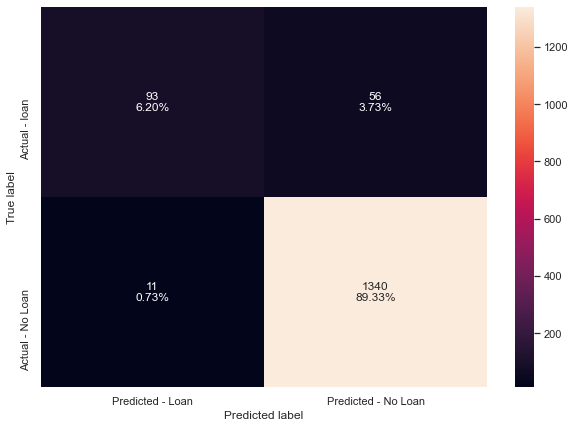

In [48]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver='newton-cg',random_state=1)
model  = lg.fit(X_train,y_train)

# checking model performances for this model
scores_LR = get_metrics_score(model,X_train,X_test,y_train,y_test)


# creating confusion matrix
print(" ====On testing Dataset====")
make_confusion_matrix(lg,X_test,y_test)

## ROC - AUC 

 ROC - AUC on training set

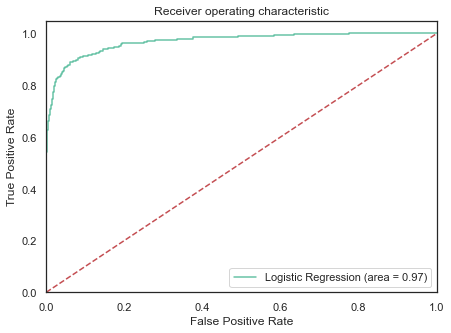

In [49]:
# ROC - AUC on training set

logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




ROC - AUC on testing set

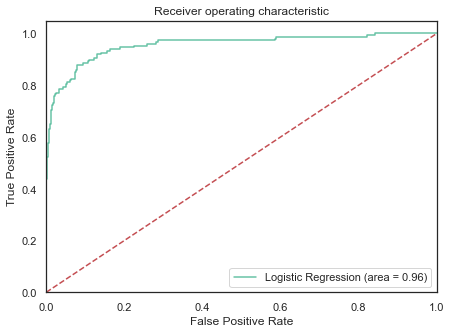

In [50]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Observation

* Logistic Regression model is giving a good performance on training and test set 

## Finding the coefficients

In [51]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,Age,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,County_92634,County_92717,County_93077,County_96651,County_Alameda County,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
coef,0.004564,0.060584,0.228717,0.00091,-0.989954,-0.962927,1.366741,0.586139,-2.551069,1.159764,1.391305,0.432671,-0.432671,-1.667009,1.667009,0.275543,-0.275544,0.467511,-0.467512,-0.005009,0.305735,-0.000705,-0.000619,-0.101257,-0.120874,0.148738,-0.274153,-0.193041,-0.344697,-0.005708,0.938444,-0.016428,-0.068024,0.199497,-0.210831,-0.152861,-0.10229,-0.004539,0.035737,0.477862,1.126391,0.027229,-0.114753,-0.584661,0.044318,0.142187,-0.007001,-0.336539,-0.994066,0.257377,0.134493,0.015804,-0.288567,-0.058655,0.462909,0.506206,-0.355984,-0.109174,-0.082616,0.060059,-0.349934


## Coefficient interpretation

* Coefficients of Family of 1, Family of 2, education_1, Security_account - yes, CD account - no, online - n0, Credit card - yes will lead to decrease in chances of a person going for loan
* Coefficients of Age, Income, CC Avg balance, Mortgage, Family of 3 or 4, Eductation 2&3, Security accoun - no, CD account yes, online - no, outside credit card no will increase changes of a person going for loan
* Direct dependency on counties where the customer belong - some are negative and some are positive -- Too many counties hence not calling out the variable names


###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, odds = exp(b)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

**Odds from Coefficients**

In [52]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

,Age,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,County_92634,County_92717,County_93077,County_96651,County_Alameda County,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
odds,1.004575,1.062456,1.256986,1.000911,0.371594,0.381774,3.922546,1.797037,0.077998,3.189181,4.020092,1.541369,0.648774,0.188811,5.296302,1.317246,0.759159,1.596017,0.626559,0.995004,1.357623,0.999296,0.999381,0.903701,0.886146,1.160369,0.760216,0.824448,0.708435,0.994308,2.556002,0.983706,0.934238,1.220789,0.809911,0.858249,0.902767,0.995471,1.036384,1.612622,3.084505,1.027603,0.891586,0.557295,1.045314,1.152793,0.993023,0.714238,0.370069,1.293533,1.143957,1.015929,0.749337,0.943032,1.588689,1.658985,0.700484,0.896574,0.920705,1.061899,0.704735


**Percentage change in odds**

In [53]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,Age,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,County_92634,County_92717,County_93077,County_96651,County_Alameda County,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
change_odds%,0.45748,6.245637,25.698588,0.091087,-62.840624,-61.822619,292.254633,79.703739,-92.200179,218.918058,302.009182,54.136867,-35.122635,-81.118911,429.630154,31.724582,-24.084073,59.601723,-37.344074,-0.499622,35.762291,-0.070441,-0.061903,-9.62993,-11.38542,16.036851,-23.978413,-17.555211,-29.156509,-0.56919,155.600171,-1.629428,-6.576198,22.078894,-19.008934,-14.175068,-9.723272,-0.452863,3.638369,61.262236,208.450467,2.760305,-10.841383,-44.27051,4.531426,15.279253,-0.697651,-28.576226,-62.993114,29.353301,14.395663,1.592911,-25.066343,-5.696783,58.868949,65.898491,-29.951589,-10.342568,-7.929546,6.189903,-29.526545


### Model Performance Improvement

#### Optimal threshold using AUC-ROC curve

In [54]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.10082538848958357


Accuracy on training set :  0.91
Accuracy on test set :  0.9166666666666666
Recall on training set :  0.9093655589123867
Recall on test set :  0.87248322147651
Precision on training set :  0.5136518771331058
Precision on test set :  0.5508474576271186
F1 on training set :  0.6564885496183206
F1 on test set :  0.6753246753246753
ROC-AUC Score on training set :  0.9097159129367867
ROC-AUC Score on test set :  0.8970114108862934
 ====On testing Dataset====
['93', '56', '11', '1340']
['6.20%', '3.73%', '0.73%', '89.33%']


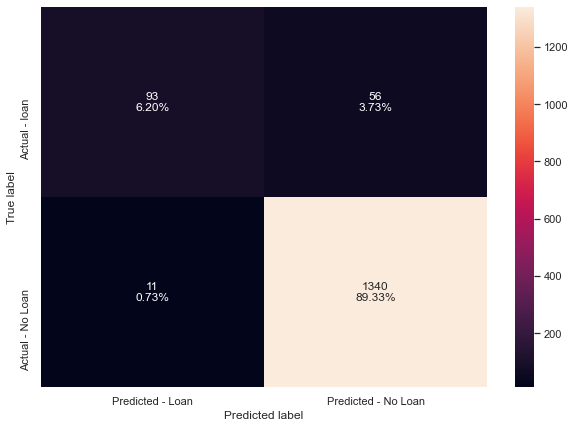

In [55]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)



# creating confusion matrix
print(" ====On testing Dataset====")
make_confusion_matrix(lg,X_test,y_test)

**Higher recall, lower accuracy from the previous model**

#### Let's use Precision-Recall curve and see if we can find a better threshold

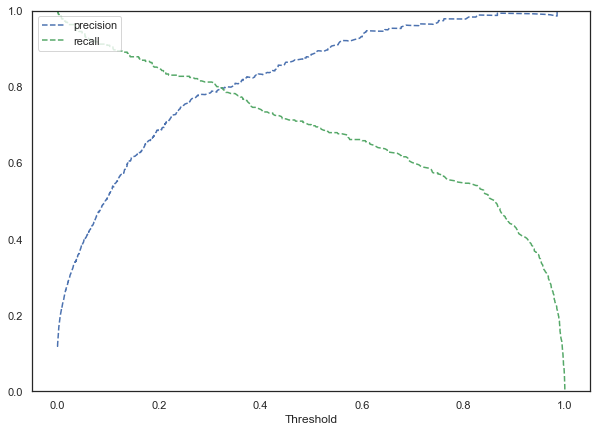

In [56]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

 At the threshold of .34, we get a balanced recall and precision

Accuracy on training set :  0.9608571428571429
Accuracy on test set :  0.9586666666666667
Recall on training set :  0.7824773413897281
Recall on test set :  0.7248322147651006
Precision on training set :  0.7993827160493827
Precision on test set :  0.8372093023255814
F1 on training set :  0.7908396946564886
F1 on test set :  0.7769784172661871
ROC-AUC Score on training set :  0.880983069558859
ROC-AUC Score on test set :  0.8546440866571616
 ====On testing Dataset====
['93', '56', '11', '1340']
['6.20%', '3.73%', '0.73%', '89.33%']


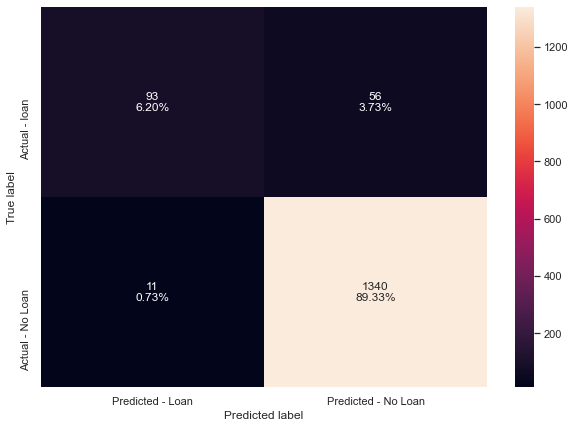

In [57]:
optimal_threshold_curve = 0.34

scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

# creating confusion matrix
print(" ====On testing Dataset====")
make_confusion_matrix(lg,X_test,y_test)

### Sequential Feature Selector
Selecting subset of important features using Sequential Feature Selector method



In [58]:
# Sequential feature selector is present in mlxtend library

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [59]:
## Defining X and Y variables
X=df_cp.drop(['Personal_Loan', 'ID'],axis=1)
y=df_cp['Personal_Loan']

#Split X and y into training and test set in 70:30 ratio 
#Convert categorical variables to dummy variables
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=1)

In [60]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [61]:
X_train.shape

(3500, 61)

In [62]:
# we will first build model with all varaible
sfs = SFS(model, k_features=61, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    3.1s finished

[2021-06-16 10:43:11] Features: 1/61 -- score: 0.40456944185757754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished

[2021-06-16 10:43:13] Features: 2/61 -- score: 0.7116544393807404[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  44 out of  59 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.7s finished

[2021-06-16 10:43:14] Features: 3/61 -- score: 0.7211692058138724[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.8s finished

[2021-06-16 10:44:08] Features: 32/61 -- score: 0.7806536298682896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.0s finished

[2021-06-16 10:44:10] Features: 33/61 -- score: 0.7806536298682896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.9s finished

[2021-06-16 10:44:12] Features: 34/61 -- score: 0.7806536298682896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.9s finished

[2021-06-16 10:44:14] Features: 35/61 -- score: 0.7799777651074388[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 co

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2021-06-16 10:44:49] Features: 60/61 -- score: 0.758796035565406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished

[2021-06-16 10:44:50] Features: 61/61 -- score: 0.7511726591306308

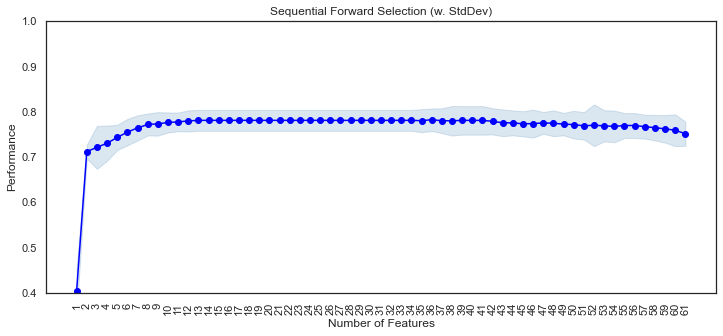

In [63]:
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(12,5))
plt.ylim([.4, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=90)
plt.show()


 * We will use 13 features - performance only increases till 13th feauture

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  46 out of  61 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    0.6s finished

[2021-06-16 10:44:51] Features: 1/13 -- score: 0.40456944185757754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished

[2021-06-16 10:44:53] Features: 2/13 -- score: 0.7116544393807404[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  44 out of  59 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.7s finished

[2021-06-16 10:44:55] Features: 3/13 -- score: 0.7211692058138724[Parallel(n_

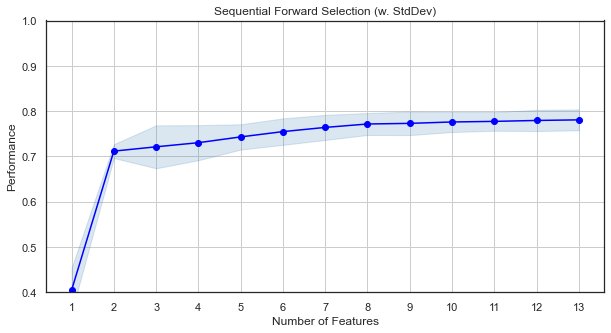

In [64]:
sfs1 = SFS(model, k_features=13, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev',figsize=(10,5))

plt.ylim([0.4, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

***Finding which features are important? ***

In [65]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 4, 6, 8, 11, 13, 17, 18, 20, 28, 36, 48, 50]


### Lets look at the variables

In [66]:
X_train.columns[feat_cols]

Index(['Income', 'Family_1', 'Family_3', 'Education_1', 'Securities_Account_0',
       'CD_Account_0', 'CreditCard_0', 'CreditCard_1', 'County_92717',
       'County_Humboldt County', 'County_Monterey County',
       'County_San Mateo County', 'County_Santa Clara County'],
      dtype='object')

In [67]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [68]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

### Lets look at model performance

Accuracy on training set :  0.9628571428571429
Accuracy on test set :  0.9546666666666667
Recall on training set :  0.6948640483383686
Recall on test set :  0.6040268456375839
Precision on training set :  0.888030888030888
Precision on test set :  0.9090909090909091
F1 on training set :  0.7796610169491526
F1 on test set :  0.7258064516129032
 ====On testing Dataset====
['93', '56', '11', '1340']
['6.20%', '3.73%', '0.73%', '89.33%']


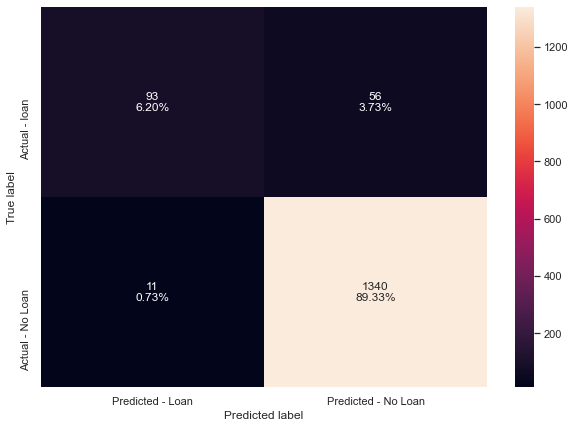

In [69]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,flag=True)


# creating confusion matrix
print(" ====On testing Dataset====")
make_confusion_matrix(lg,X_test,y_test)

## Model performance summary 

In [70]:
# defining list of model
models = [lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,flag=False)
    k = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    l = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    
    #intial model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    #optimal threshold_auc_roc
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])
    
    #optimal threshold = 0.34
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

In [71]:
# defining list of model
models = [logreg]

# looping through all the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [72]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression- using AUC - ROC curve',
                                          'Logistic Regression-0.34 Threshold)','Logistic Regression (SFS - 13 variable)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_Score':f1_train,'Test_F1_Score':f1_test}) 



comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_Score,Test_F1_Score
0,Logistic Regression,0.963143,0.955333,0.700906,0.624161,0.885496,0.894231,0.782462,0.735178
1,Logistic Regression- using AUC - ROC curve,0.910000,0.916667,0.909366,0.872483,0.513652,0.550847,0.656489,0.675325
2,Logistic Regression-0.34 Threshold),0.960857,0.958667,0.782477,0.724832,0.799383,0.837209,0.790840,0.776978
3,Logistic Regression (SFS - 13 variable),0.962857,0.954667,0.694864,0.604027,0.888031,0.909091,0.779661,0.725806


### Conclusion
- We have been able to build a predictive model that can be used by the bank to find the target for personal loans, model with threshold using AUC-ROC has the highed accuracy and recall 
- Following features are important: 'Income', Family size, Education, Security account, CD account, Credit Card       



# Decision Tree 

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [73]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             5000 non-null   int64  
 1   Age                            5000 non-null   int64  
 2   Income                         5000 non-null   int64  
 3   CCAvg                          5000 non-null   float64
 4   Mortgage                       5000 non-null   int64  
 5   Personal_Loan                  5000 non-null   int64  
 6   Family_1                       5000 non-null   uint8  
 7   Family_2                       5000 non-null   uint8  
 8   Family_3                       5000 non-null   uint8  
 9   Family_4                       5000 non-null   uint8  
 10  Education_1                    5000 non-null   uint8  
 11  Education_2                    5000 non-null   uint8  
 12  Education_3                    5000 non-null   u

In [74]:
#dropping columns before running the model
X=df_cp.drop(['Personal_Loan', 'ID'],axis=1)
y=df_cp['Personal_Loan']

column_names = list(X.columns)
feature_names = column_names
print(feature_names)

#print(X.info())
#Split X and y into training and test set in 70:30 ratio 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_1', 'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2', 'Education_3', 'Securities_Account_0', 'Securities_Account_1', 'CD_Account_0', 'CD_Account_1', 'Online_0', 'Online_1', 'CreditCard_0', 'CreditCard_1', 'County_92634', 'County_92717', 'County_93077', 'County_96651', 'County_Alameda County', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_S

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

class_weight is a hyperparameter for the decision tree classifier.

In [75]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [76]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [77]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

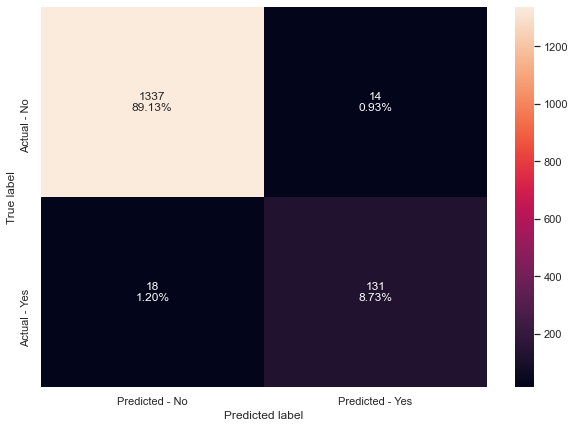

In [78]:
make_confusion_matrix(model, y_test)

In [79]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

We only have 10% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- **True Positives:**
    - Reality: Customer opts for personal loan
    - Model predicted: The customer will opt for personal loan.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT opt for personal loan.
    - Model predicted: The customer will NOT opt for personal loan
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT opt for personal loan
    - Model predicted: The customer will opt for personal loan
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not opting for personal loan

- **False Negatives:**
    - Reality: A customer opt for personal loan
    - Model predicted: The customer will NOT opt for personal loan.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer opts for personal loan (Customer retention will get affected.)

## Conclusion: 
**In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.**

In [80]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
    print("Accuracy on training set : ", metrics.accuracy_score(y_train, pred_train))
    print("Accuracy on test set : ", metrics.accuracy_score(y_test, pred_test))

In [81]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8791946308724832
Accuracy on training set :  1.0
Accuracy on test set :  0.9786666666666667


* There is a  disparity in performance of model on training set and test set, which suggests that the model is overfiting.

## Visualizing the Decision Tree

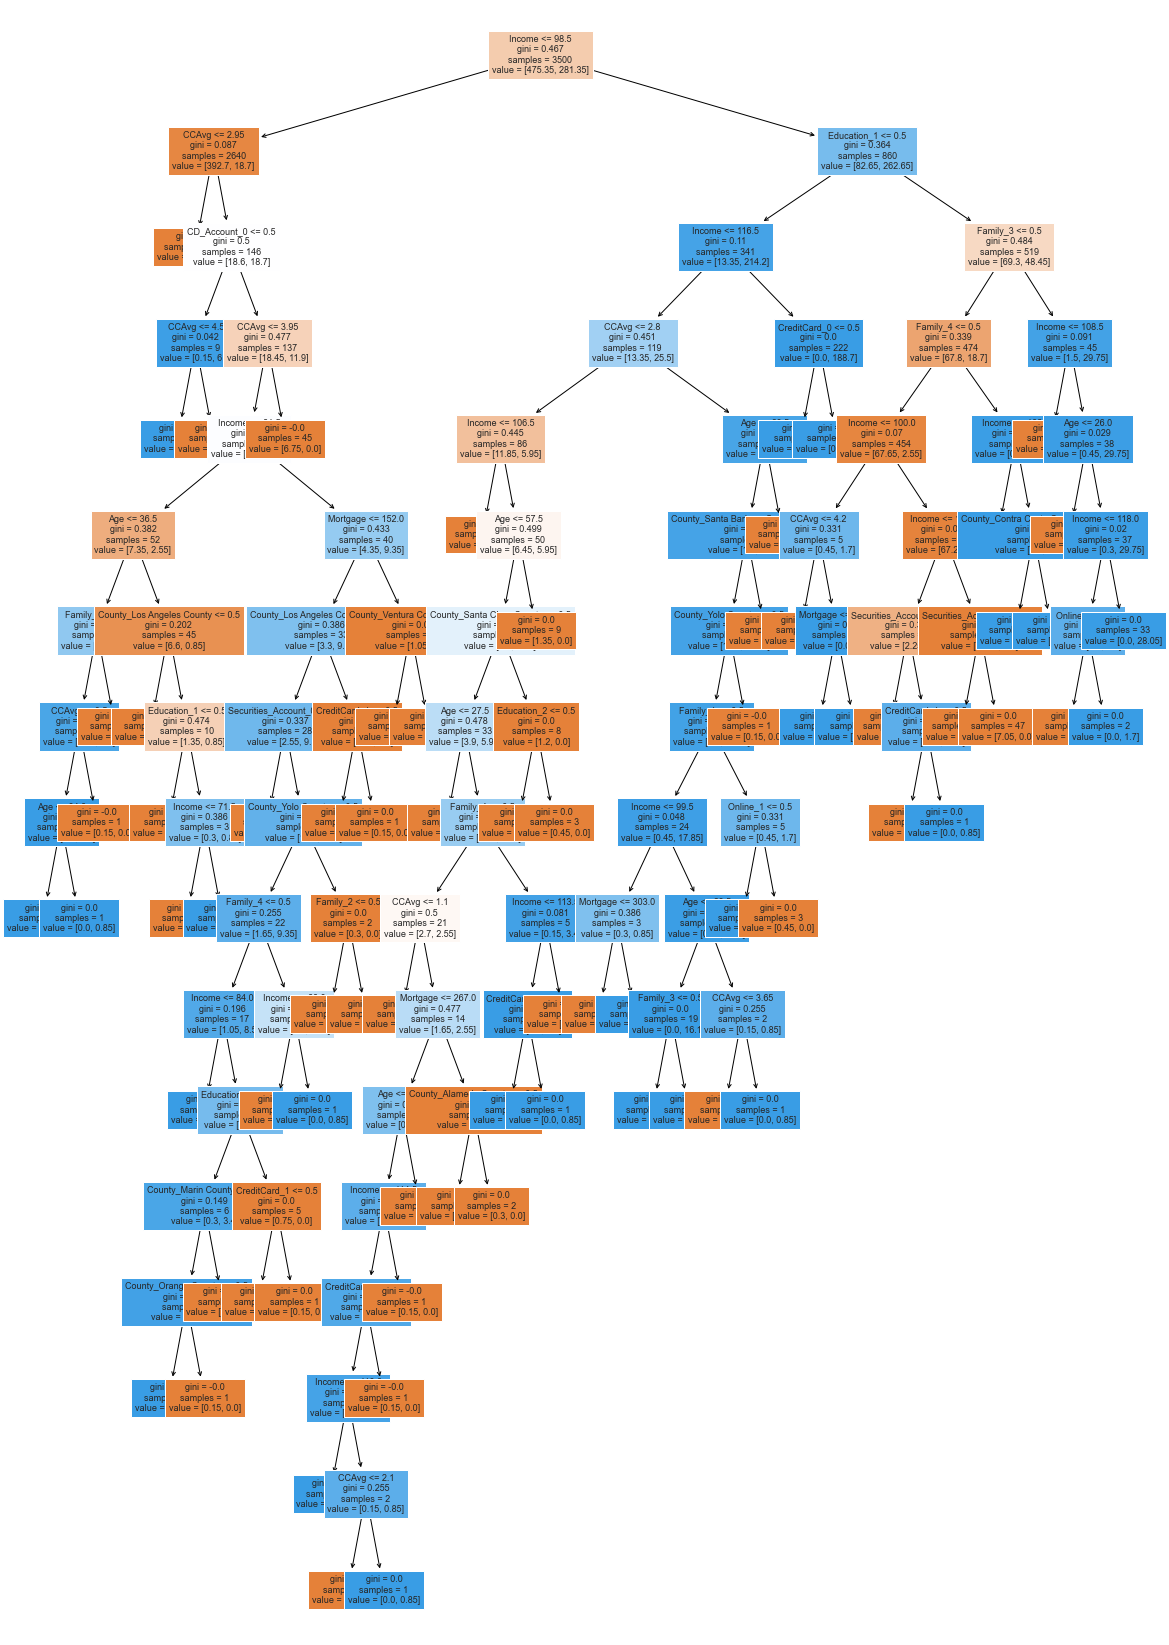

In [82]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [83]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_0 <= 0.50
|   |   |   |--- CCAvg <= 4.50
|   |   |   |   |--- weights: [0.00, 6.80] class: 1
|   |   |   |--- CCAvg >  4.50
|   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |--- CD_Account_0 >  0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Age <= 34.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Age >  34.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 

In [84]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
Income                         5.965671e-01
Education_1                    1.279403e-01
CCAvg                          8.188825e-02
Family_4                       7.367876e-02
Family_3                       7.032437e-02
Age                            1.193903e-02
CD_Account_0                   1.099955e-02
Mortgage                       6.155754e-03
County_Los Angeles County      3.773823e-03
Securities_Account_1           2.769228e-03
County_Santa Clara County      2.208411e-03
Securities_Account_0           2.207051e-03
Online_1                       2.013197e-03
County_Yolo County             1.963808e-03
Online_0                       1.442791e-03
CreditCard_1                   1.438573e-03
County_Orange County           8.128401e-04
County_Santa Barbara County    7.588619e-04
County_Marin County            7.469342e-04
Family_1                       3.714074e-04
CreditCard_0                   2.311426e-15
County_Contra Costa County     2

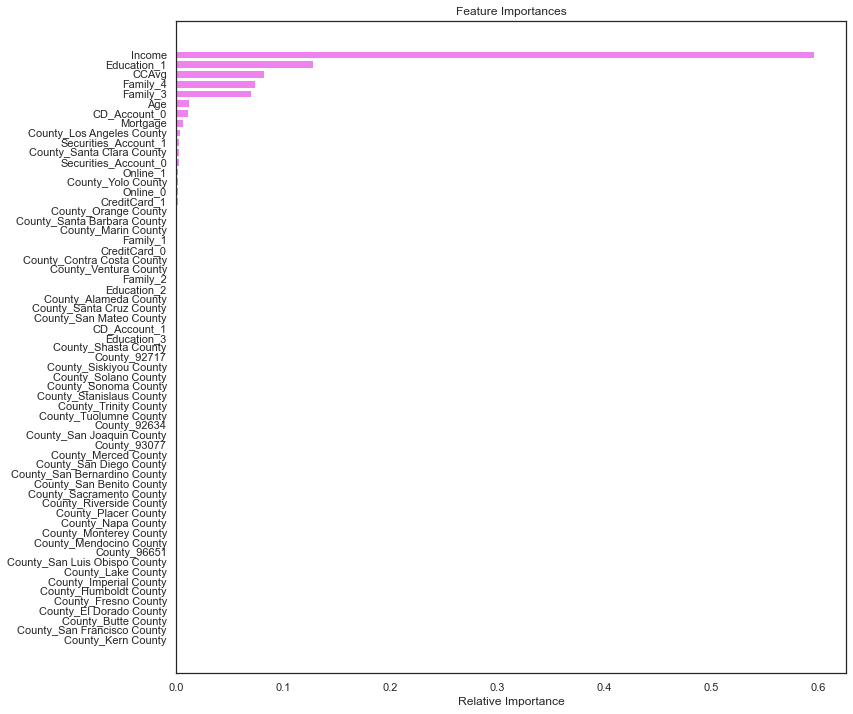

In [85]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income, education_1, CC Avg, Family of 4 & 3, are the most important variable for predicting the chances of personal_loan

## Reducing overfitting

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=3, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

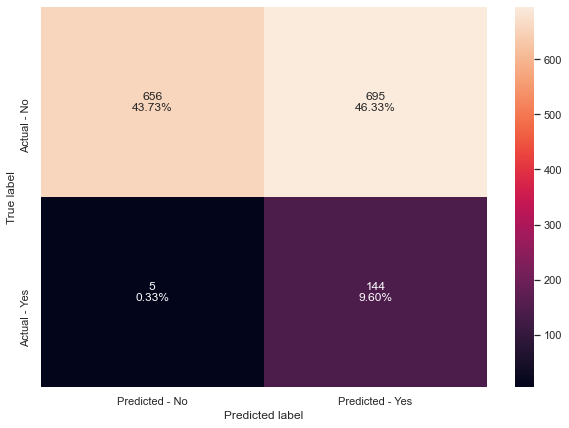

In [88]:
make_confusion_matrix(estimator, y_test)

In [89]:
get_recall_score(estimator)

Recall on training set :  0.9879154078549849
Recall on test set :  0.9664429530201343
Accuracy on training set :  0.5471428571428572
Accuracy on test set :  0.5333333333333333


## Visualize the decision tree

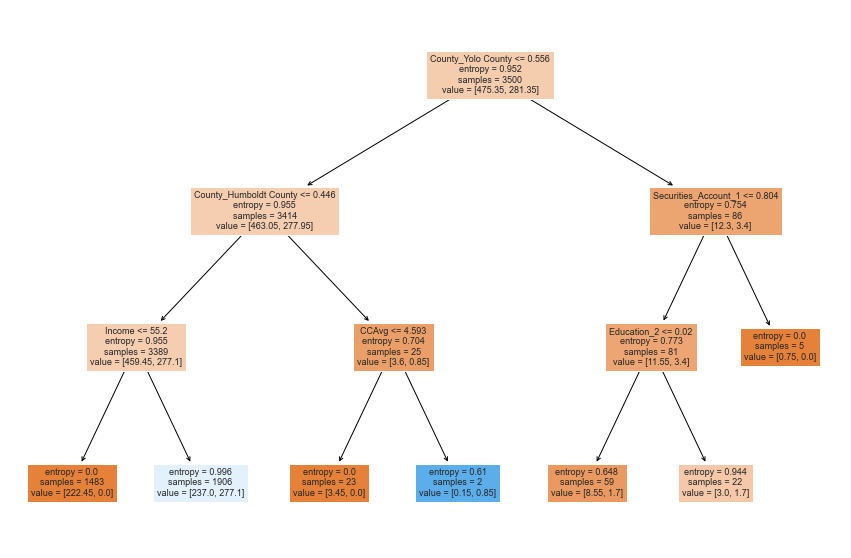

In [90]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [91]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- County_Yolo County <= 0.56
|   |--- County_Humboldt County <= 0.45
|   |   |--- Income <= 55.20
|   |   |   |--- weights: [222.45, 0.00] class: 0
|   |   |--- Income >  55.20
|   |   |   |--- weights: [237.00, 277.10] class: 1
|   |--- County_Humboldt County >  0.45
|   |   |--- CCAvg <= 4.59
|   |   |   |--- weights: [3.45, 0.00] class: 0
|   |   |--- CCAvg >  4.59
|   |   |   |--- weights: [0.15, 0.85] class: 1
|--- County_Yolo County >  0.56
|   |--- Securities_Account_1 <= 0.80
|   |   |--- Education_2 <= 0.02
|   |   |   |--- weights: [8.55, 1.70] class: 0
|   |   |--- Education_2 >  0.02
|   |   |   |--- weights: [3.00, 1.70] class: 0
|   |--- Securities_Account_1 >  0.80
|   |   |--- weights: [0.75, 0.00] class: 0



In [92]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)



                                    Imp
Income                         0.974176
CCAvg                          0.012805
County_Yolo County             0.006565
County_Humboldt County         0.002622
Education_2                    0.002454
Securities_Account_1           0.001379
County_Monterey County         0.000000
County_Merced County           0.000000
County_Napa County             0.000000
County_Orange County           0.000000
County_San Joaquin County      0.000000
County_Placer County           0.000000
County_Riverside County        0.000000
County_Sacramento County       0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Mateo County        0.000000
County_San Luis Obispo County  0.000000
County_Marin County            0.000000
County_Santa Barbara County    0.000000
County_Santa Clara County      0.000000
County_Santa Cruz County       0.000000


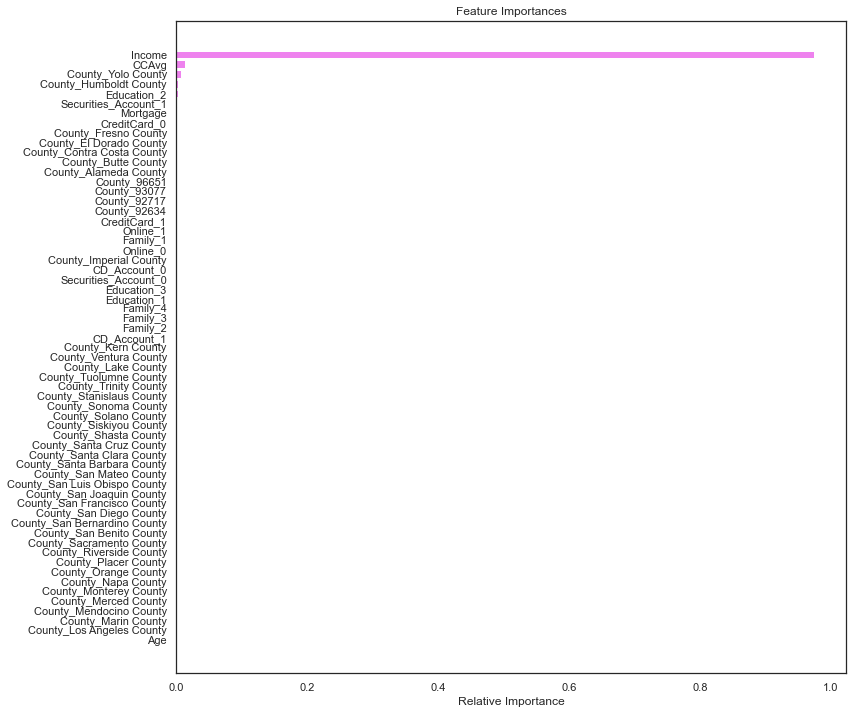

In [93]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Cost Complexity Pruning


Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [94]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [95]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.510995e-15
1,7.482671e-19,-7.510247e-15
2,7.482671e-19,-7.509499e-15
3,7.702750e-19,-7.508729e-15
4,7.702750e-19,-7.507958e-15
5,1.232440e-18,-7.506726e-15
6,1.496534e-18,-7.505229e-15
7,2.332833e-18,-7.502897e-15
8,5.832082e-18,-7.497065e-15
9,5.854090e-18,-7.491210e-15


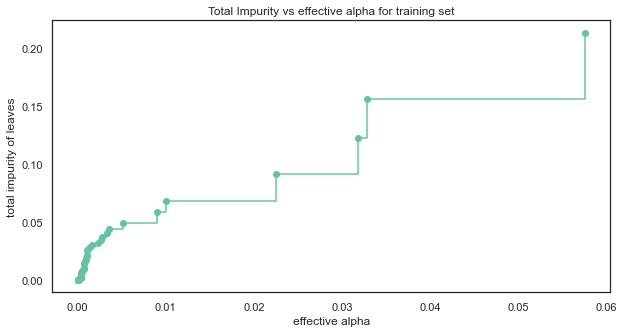

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [97]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489481023


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

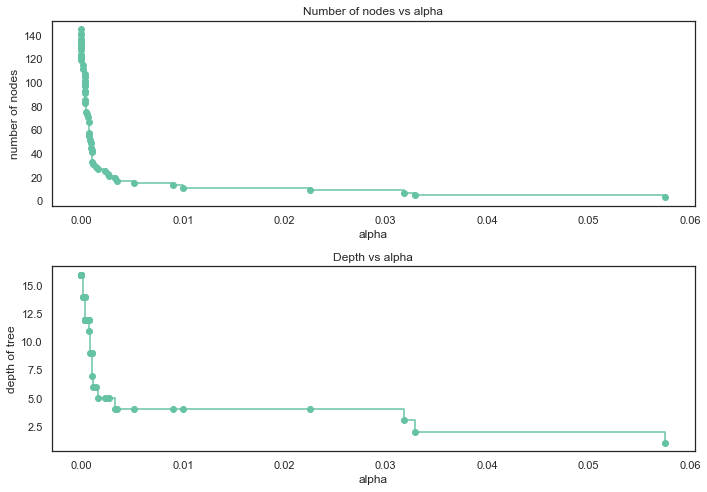

In [98]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [99]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [100]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [101]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

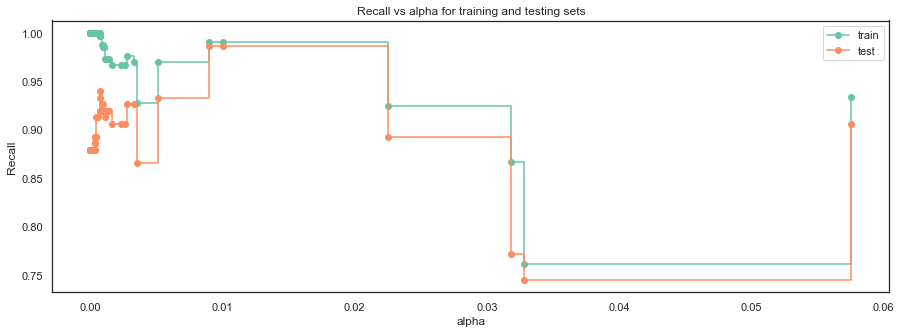

In [102]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**we can choose alpha 0.009 - 0.02**

In [103]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.009008434301508083,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [104]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009008434301508083,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

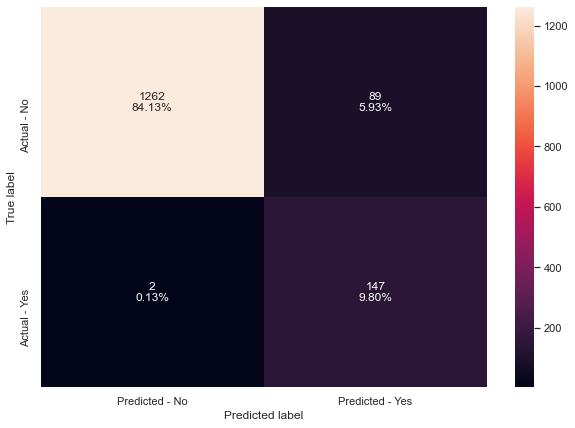

In [105]:
make_confusion_matrix(best_model, y_test)

In [106]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537
Accuracy on training set :  0.9351428571428572
Accuracy on test set :  0.9393333333333334


## Visualizing the Decision Tree

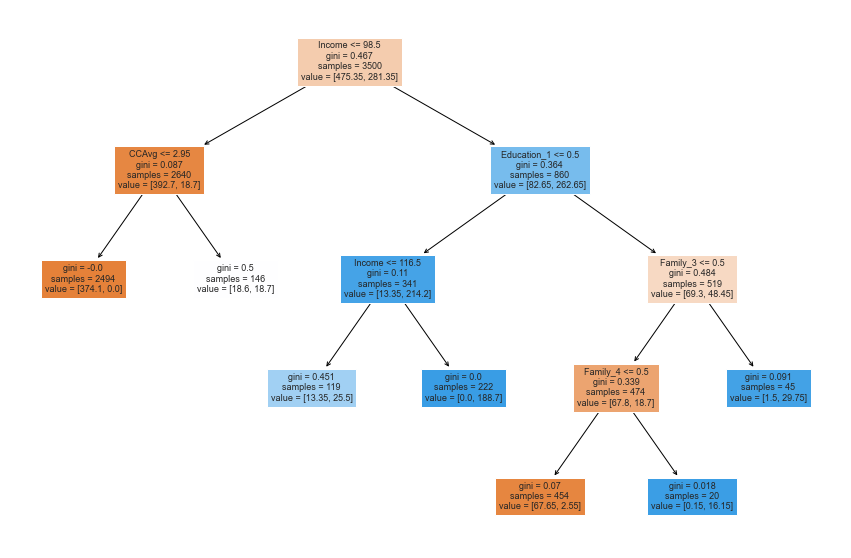

In [107]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [108]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_1 <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1
|   |--- Education_1 >  0.50
|   |   |--- Family_3 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |--- Family_3 >  0.50
|   |   |   |--- weights: [1.50, 29.75] class: 1



**Creating model with 0.009 - 0.02  yield similar results**

In [109]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.02, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

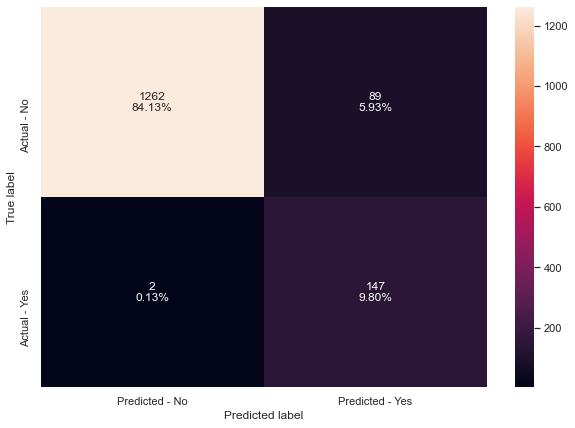

In [110]:
make_confusion_matrix(best_model2, y_test)

In [111]:
get_recall_score(best_model2)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537
Accuracy on training set :  0.9351428571428572
Accuracy on test set :  0.9393333333333334


* We are able to identify more True positives - customers that are actually going to opt for personal loan - contributing to more business

## Visualizing the Decision Tree


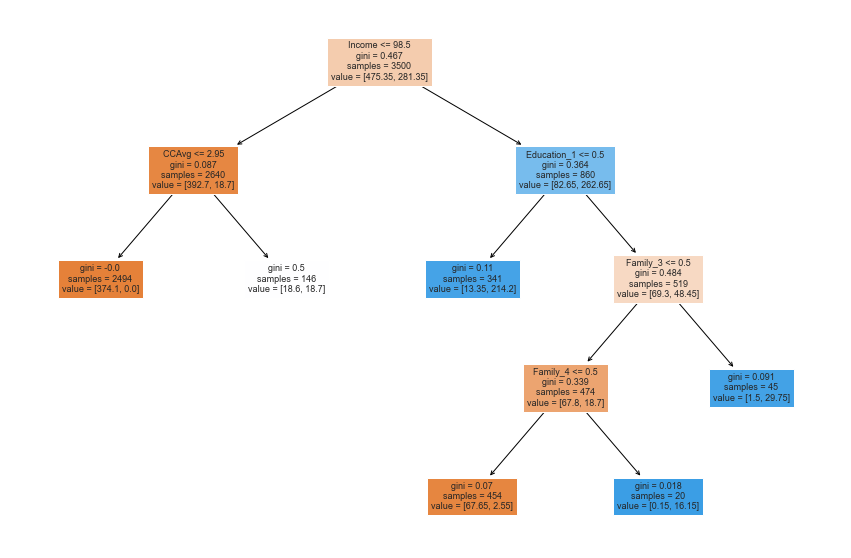

In [112]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [113]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_1 <= 0.50
|   |   |--- weights: [13.35, 214.20] class: 1
|   |--- Education_1 >  0.50
|   |   |--- Family_3 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |--- Family_3 >  0.50
|   |   |   |--- weights: [1.50, 29.75] class: 1



In [114]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.636698
Education_1                    0.144454
Family_3                       0.082413
Family_4                       0.079908
CCAvg                          0.056527
Age                            0.000000
County_Riverside County        0.000000
County_San Diego County        0.000000
County_San Bernardino County   0.000000
County_San Benito County       0.000000
County_Sacramento County       0.000000
County_Napa County             0.000000
County_Placer County           0.000000
County_Orange County           0.000000
County_San Joaquin County      0.000000
County_Monterey County         0.000000
County_Merced County           0.000000
County_San Francisco County    0.000000
County_Santa Barbara County    0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Marin County            0.000000
County_Santa Clara County      0.000000
County_Santa Cruz County       0.000000


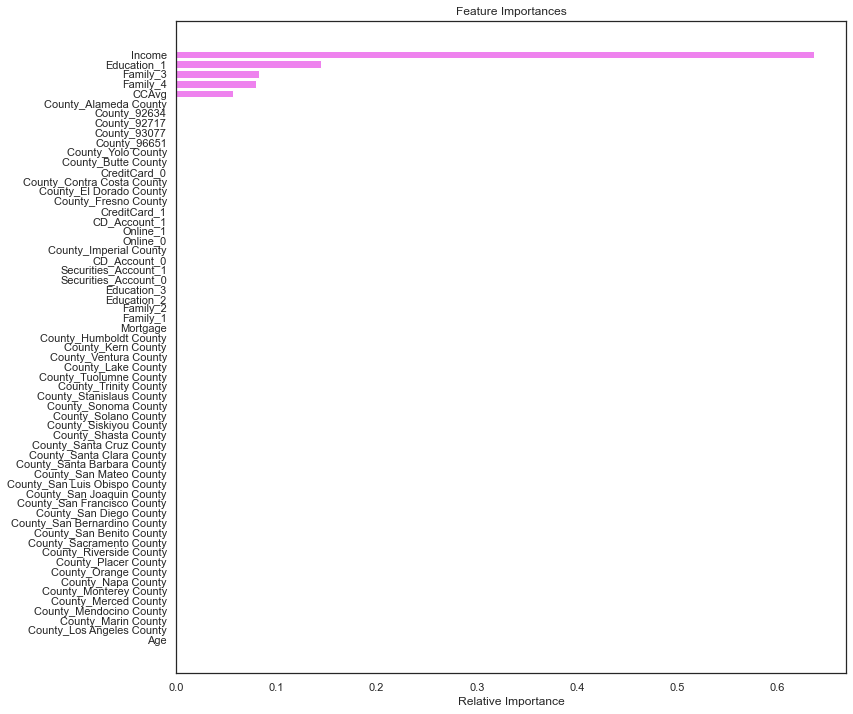

In [115]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

** Income, Education_1, Family of 3 & 4 are the most important features

## Comparing all the models

In [116]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic regression -Optimal Threshold - AUC-ROC",
            "Initial decision tree model",
            "Decision treee with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Accuracy": [.91, 1, 0.54, 0.935],
        "Test_Accuracy": [.916667, .978, 0.53, 0.939],
        "Train_Recall": [.909366, 1, 0.98, 0.99],
        "Test_Recall": [.872483, 0.879, 0.96, 0.9865],
    }
)
comparison_frame


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall
0,Logistic regression -Optimal Threshold - AUC-ROC,0.910,0.916667,0.909366,0.872483
1,Initial decision tree model,1.000,0.978000,1.000000,0.879000
2,Decision treee with hyperparameter tuning,0.540,0.530000,0.980000,0.960000
3,Decision tree with post-pruning,0.935,0.939000,0.990000,0.986500


## Comparing best performing logistic regression and Decision tree model


In [117]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic regression -Optimal Threshold - AUC-ROC",
            "Decision tree with post-pruning",
        ],
        "Train_Accuracy": [.91, 0.935],
        "Test_Accuracy": [.916667, 0.939],
        "Train_Recall": [.909366, 0.99],
        "Test_Recall": [.872483, 0.9865],
    }
)
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall
0,Logistic regression -Optimal Threshold - AUC-ROC,0.910,0.916667,0.909366,0.872483
1,Decision tree with post-pruning,0.935,0.939000,0.990000,0.986500


## Conclusion 

* Decision tree model with post-pruning is the best performing model to determine customers who will opt for personal loan


# Incorrect predictions - for the decision tree model

 

Perform an Exploratory Data Analysis on the incorrectly predicted data
- Do an analysis of all the incorrectly predicted or misclassified samples ( Eg: original label = 0 but model predicted it as 1) - Perform EDA on such points to see if there is a pattern

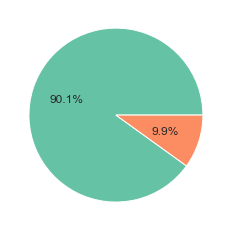

In [118]:
df_incorrect = X_test.copy()

df_incorrect['Actual'] = y_test
df_incorrect['Predicted']= best_model.predict(X_test)

plt.pie(data=df_incorrect,x=df_incorrect["Actual"].value_counts(),autopct='%1.1f%%')
None

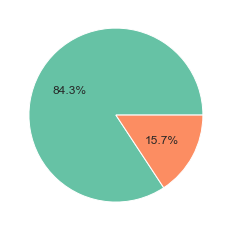

In [119]:
plt.get_cmap('hsv')
plt.pie(data=df_incorrect,x=df_incorrect["Predicted"].value_counts(),autopct='%1.1f%%')
None

In [120]:
pd.crosstab(df_incorrect['Actual'],df_incorrect['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,1262,89,1351
1,2,147,149
All,1264,236,1500


In [121]:
# Rows that were classified as Negative when they were actually positive
false_negative_rows = df_incorrect[(df_incorrect['Actual'] == 1) & (df_incorrect['Predicted'] == 0)]
false_negative_rows[['Age','Income','CCAvg','Family_1','Family_2','Family_3','Family_4','Education_1','Education_2','Education_3']]

,Age,Income,CCAvg,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
322,63,101,3.9,1,0,0,0,1,0,0
1126,32,104,3.7,0,1,0,0,1,0,0


## Observation

* two rows where model predicted negative when it was actually positive. 

In [122]:
# Rows that were classified as postives when they were actually negative
false_positive_rows = df_incorrect[(df_incorrect['Actual'] == 0) & (df_incorrect['Predicted'] == 1)]
print(false_positive_rows.info())
false_positive_rows[['Age','Income','CCAvg','Family_1','Family_2','Family_3','Family_4','Education_1','Education_2','Education_3']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 932 to 3505
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            89 non-null     int64  
 1   Income                         89 non-null     int64  
 2   CCAvg                          89 non-null     float64
 3   Mortgage                       89 non-null     int64  
 4   Family_1                       89 non-null     uint8  
 5   Family_2                       89 non-null     uint8  
 6   Family_3                       89 non-null     uint8  
 7   Family_4                       89 non-null     uint8  
 8   Education_1                    89 non-null     uint8  
 9   Education_2                    89 non-null     uint8  
 10  Education_3                    89 non-null     uint8  
 11  Securities_Account_0           89 non-null     uint8  
 12  Securities_Account_1           89 non-null     u

,Age,Income,CCAvg,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
932,51,112,1.8,0,0,1,0,0,1,0
792,41,98,4.0,1,0,0,0,0,0,1
2982,59,111,4.4,0,0,1,0,1,0,0
3420,66,114,0.8,1,0,0,0,0,0,1
3144,43,104,1.0,0,0,1,0,1,0,0
4868,51,62,3.2,0,1,0,0,0,0,1
3741,53,51,3.2,0,1,0,0,0,0,1
3501,65,105,1.7,0,0,0,1,0,0,1
3990,57,59,3.7,0,1,0,0,1,0,0
169,27,112,2.1,0,0,0,1,0,0,1


## Observation

* 89 rows where model predicted positive when it was actually negative. 

## Concluding Summary 

* Please see inline comments for observations 
* **To predict whether a liability customer will buy a personal loan or not:** 
    1. Analysed the dataset using different logistic regression models and Decision tree classifier for determining whether a customer will opt in for personal loan or not
        * Logistic regression: 
            * Best performing model (highest accuracy & recall) was with using threshold using AUC-ROC curve. 
        * Decision tree:
            * Post pruning model was the best performing model (#3)
    2. Decision tree with post-pruning is the best performing model to determine customer who will opt in for the personal loan. 
* **Which variables are most significant:**
    * Most important features were Income, Education, CC Avg and Family size. 
    
* **Which segment of customers should be targeted more:**
    * Family size 3 & 4 are more likely to go for personal loan
    * Customer with with higher income 
    * Customers with higher average monthly credit usageS
    
    
    
    

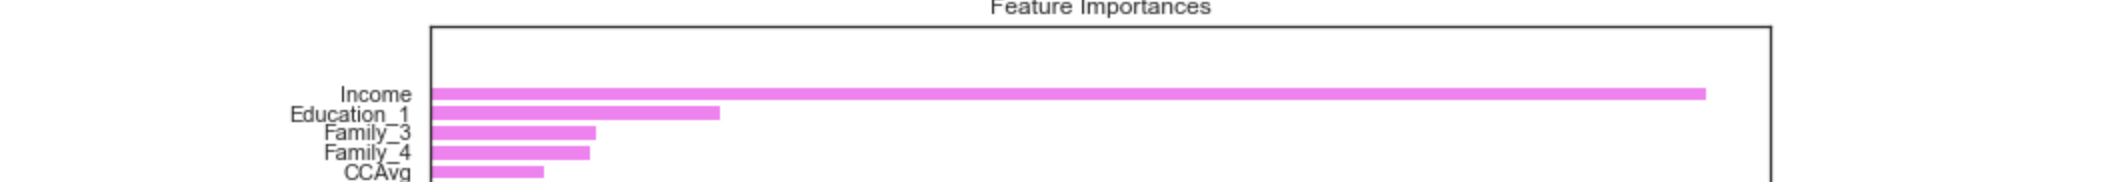
    
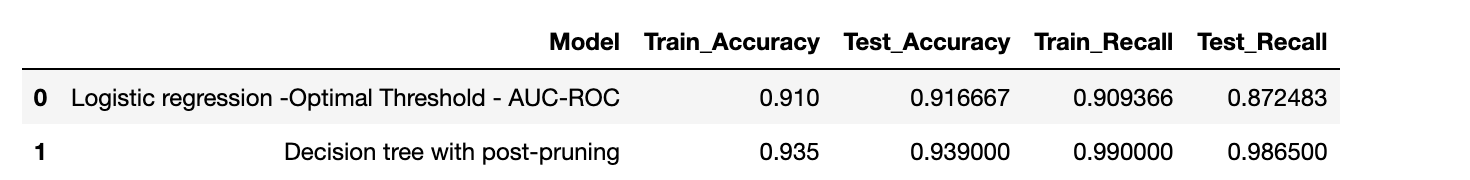

